# DynapSE Simulator

In [1]:
# - Switch off warnings
import warnings
warnings.filterwarnings('ignore')

# - Rockpool
from rockpool import TSEvent, TSContinuous
from rockpool.nn.modules import TimedModuleWrapper

# - Numpy
import numpy as np

# - Pretty printing
try:
    from rich import print
except:
    pass

# T- QDM
from tqdm.autonotebook import tqdm

# - Plotting imports and config
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 300

In [2]:
import sys  
sys.path.insert(0, '/home/ugurc/SynSense Dropbox/Ugurcan Cakal/repos/rockpool__dynapse/rockpool/devices/dynapse')

from dynapse1_neuron_synapse_jax import DynapSE1NeuronSynapseJax

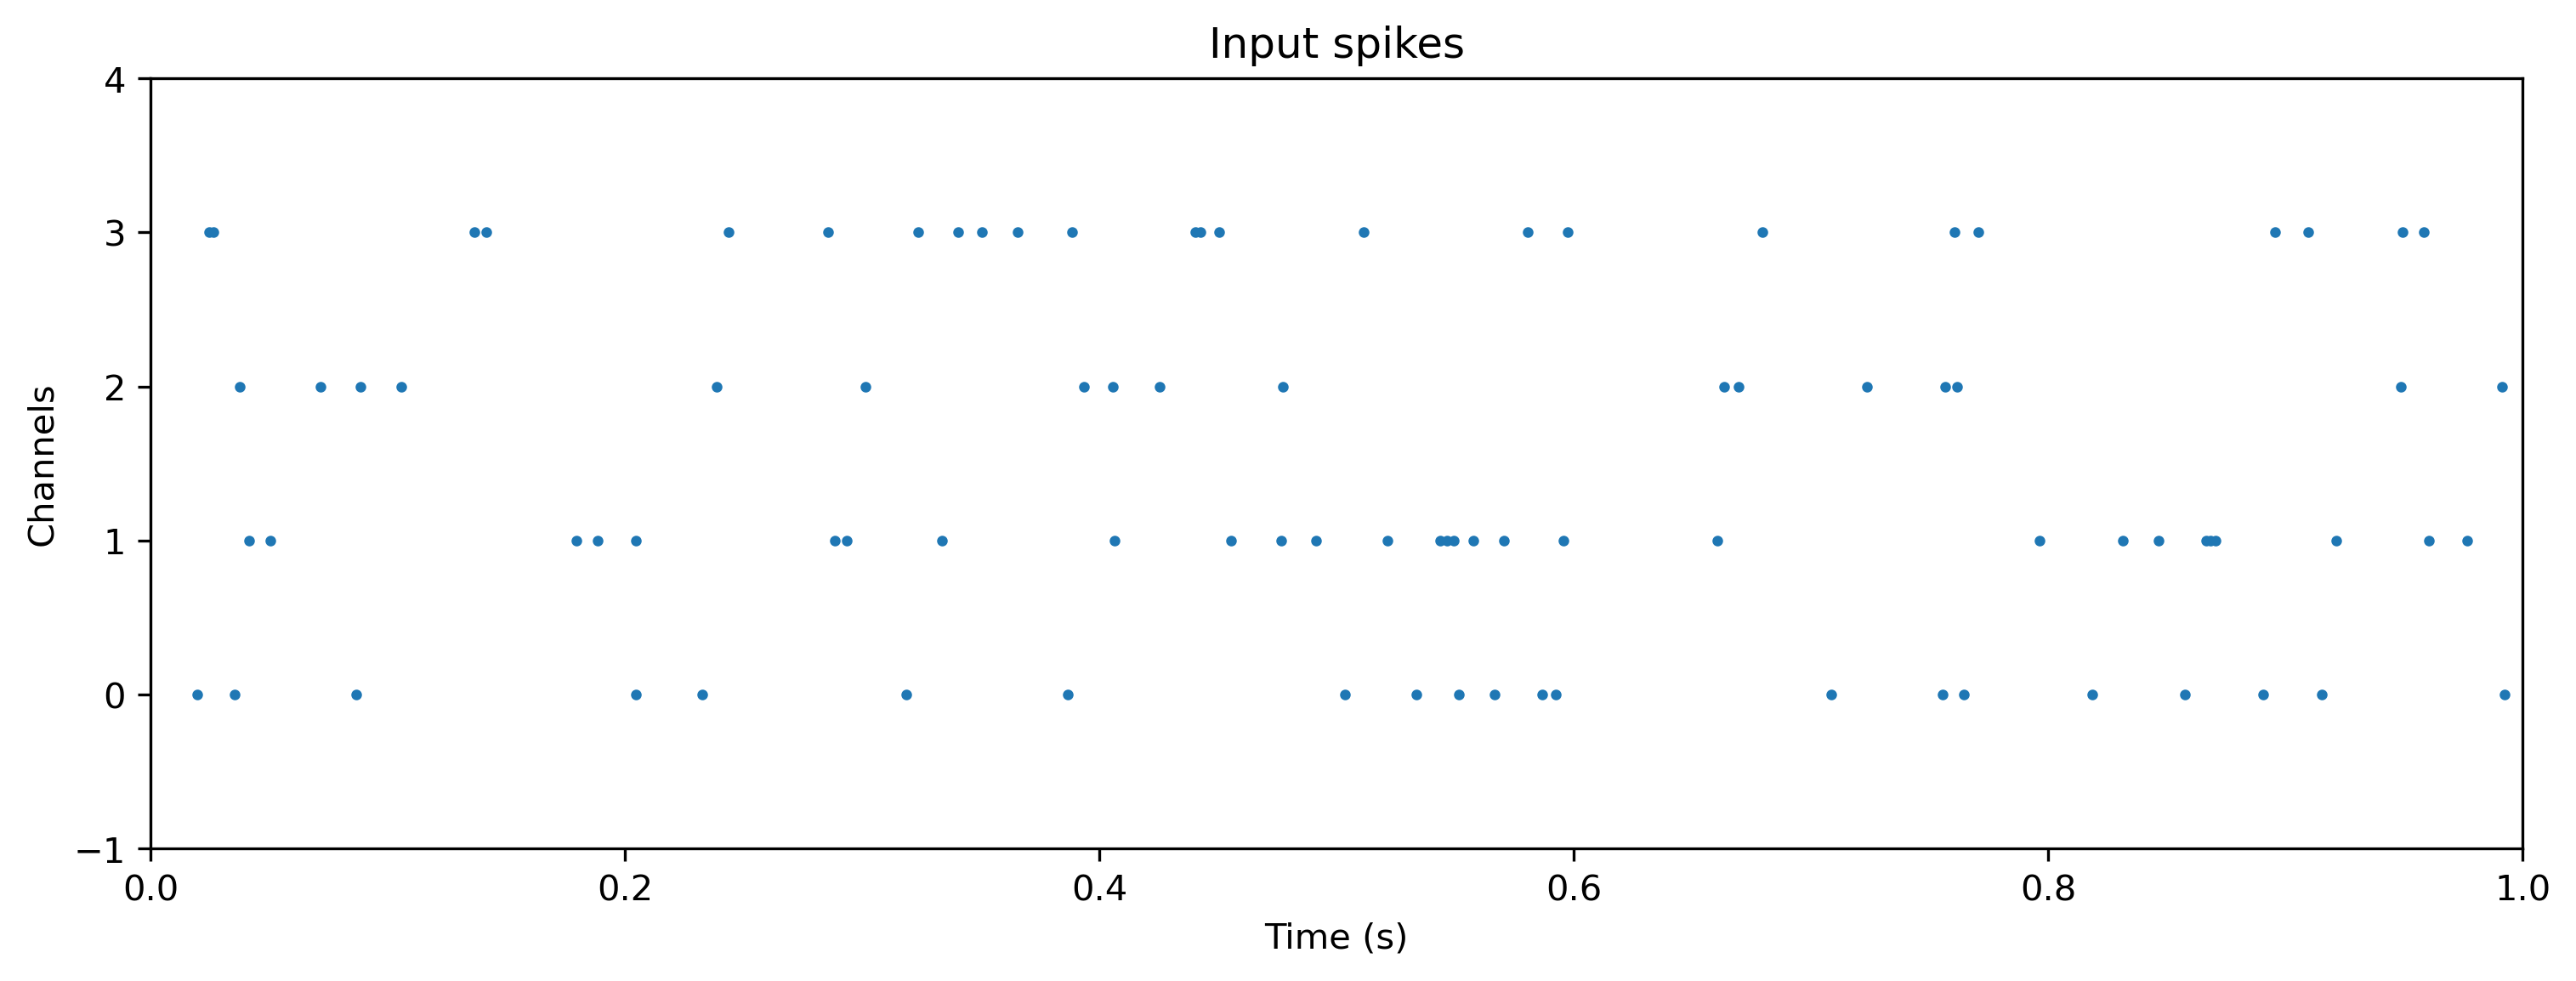

In [3]:
# - Define input and target
Nin = 4
dt = 1e-3

# - Generate a time base
dur_input = 1000e-3
T = int(np.round(dur_input / dt))

# - Generate a Poisson frozen random spike train
spiking_prob = .02
input_sp_raster = np.random.rand(T, Nin) < spiking_prob
input_sp_ts = TSEvent.from_raster(input_sp_raster, name = 'Input spikes', periodic = True, dt = dt)

# - Plot the input and target signals
plt.figure()
input_sp_ts.plot(s = 4)
plt.show()

In [4]:
# - Network size
N = 4

# - Initial parameters
tau_mem = np.ones(N)*15e-3
tau_syn = np.ones(N)*150e-3
bias = np.ones(N)*-1.



se1 = TimedModuleWrapper(
    DynapSE1NeuronSynapseJax(
        shape = (N),
        out_rate = 0.02,
        update_type ='dpi',
        dt = dt), dt = dt)

print(se1)

TimedModuleWrapper  with shape (4, 4) {
    DynapSE1NeuronSynapseJax '_module' with shape (4,)
} with DynapSE1NeuronSynapseJax '_module' as module


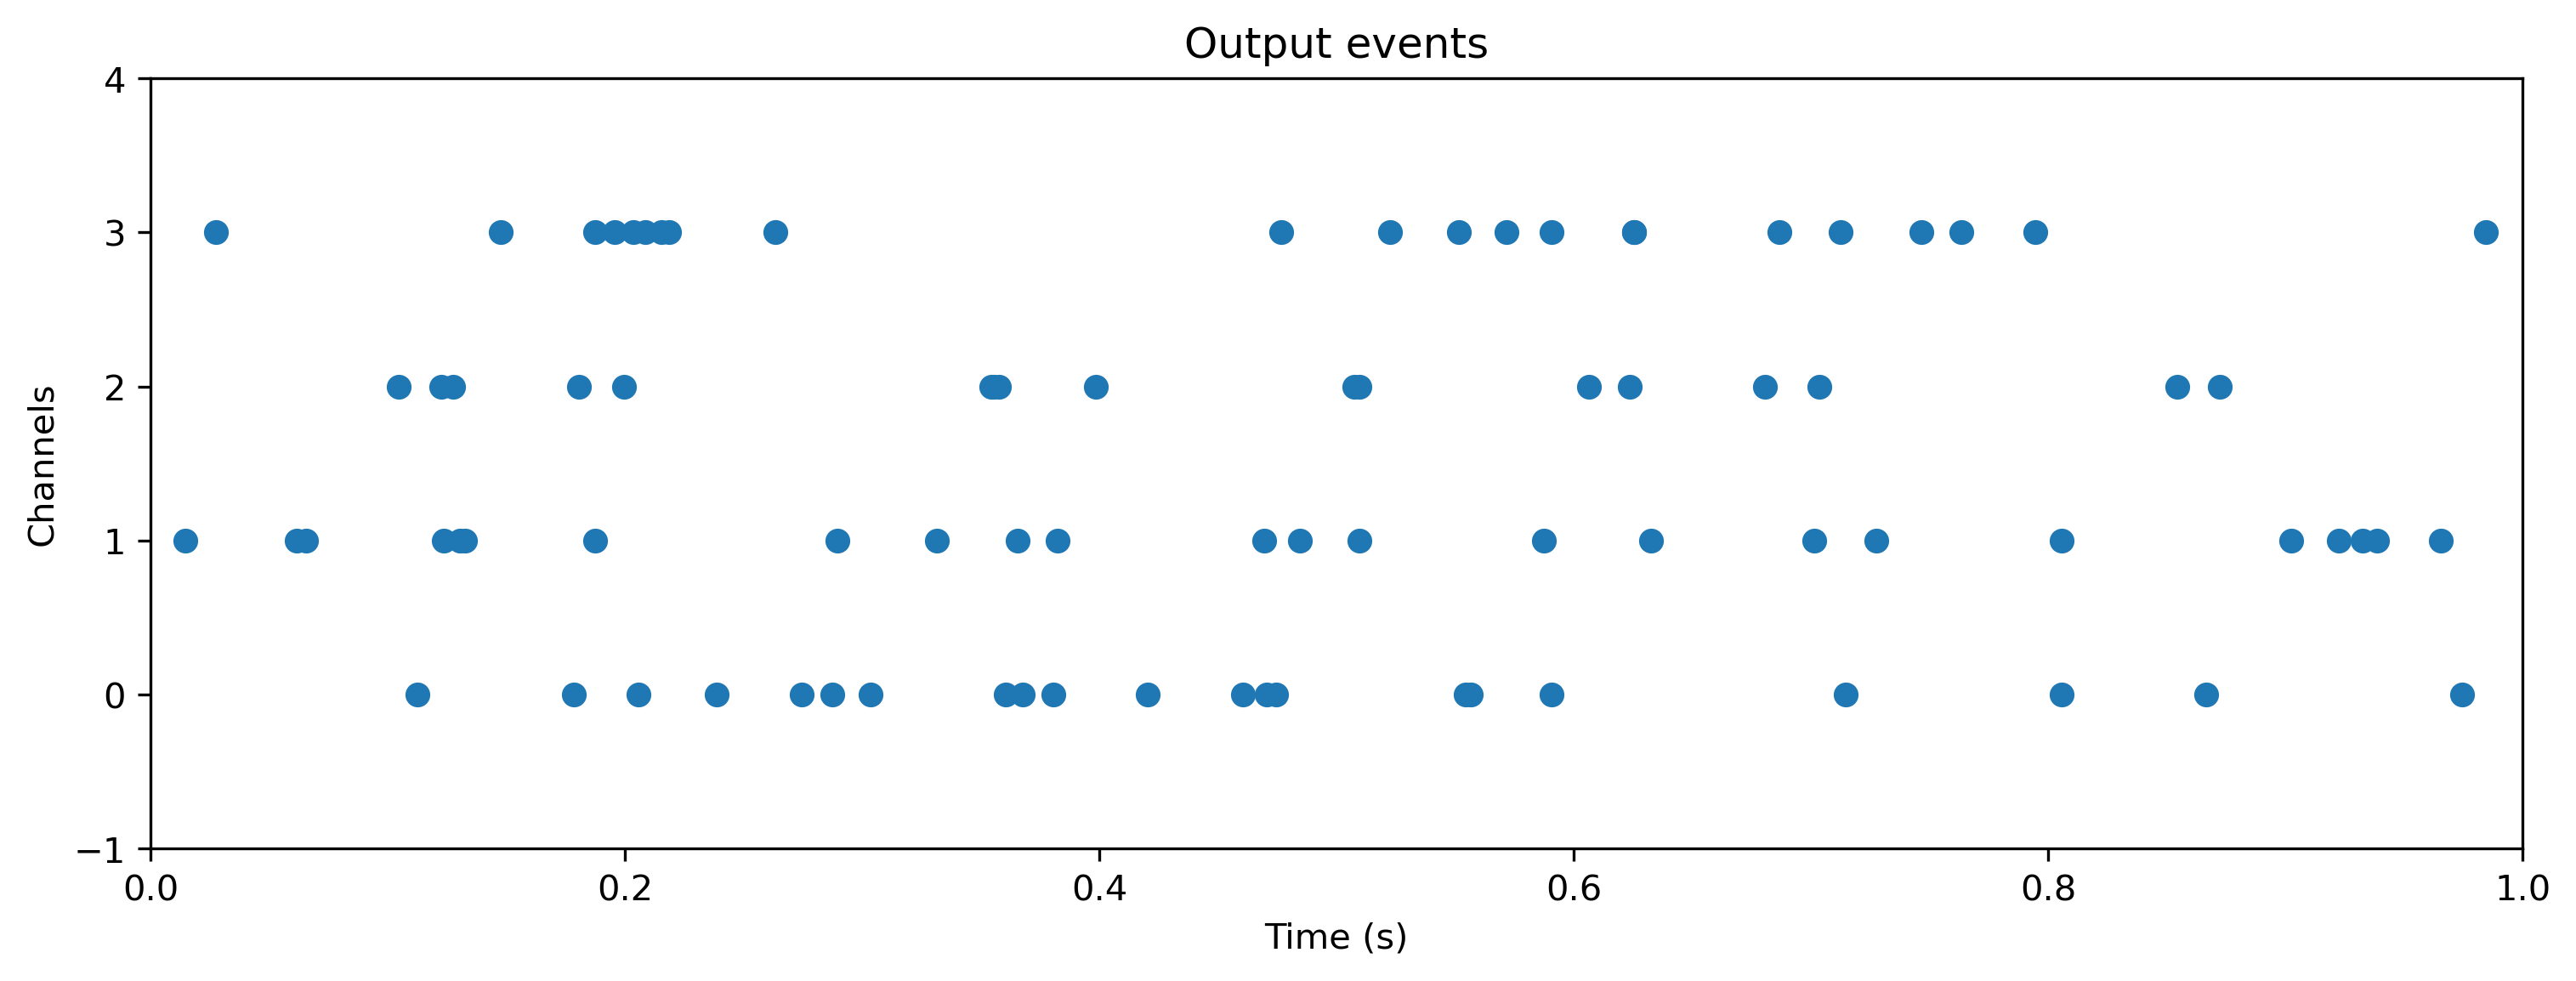

In [5]:
# - Randomise the network state
se1.reset_state()

# - Evolve with the frozen noise spiking input
tsOutput, new_state, record_dict = se1(input_sp_ts, record = True)

# - Plot the analog output
plt.figure()
tsOutput.plot();

In [6]:
# - Make a function that converts ``record_dict``
def plot_record_dict(rd):
    Iahp_ts = TSContinuous.from_clocked(rd['Iahp'], dt = dt, name = '$I_{ahp}$')
    Inmda_ts = TSContinuous.from_clocked(rd['Inmda'], dt = dt, name = '$I_{nmda}$')
    spikes_ts = TSEvent.from_raster(rd['spikes'], dt = dt, name = 'Output Spikes')

    # - Plot the internal activity of selected neurons
    
    plt.figure()
    input_sp_ts.plot()
    
    plt.figure()
    Inmda_ts.plot(stagger = 1e-7)

    plt.figure()
    spikes_ts.plot();
    
    plt.figure()
    Iahp_ts.plot(stagger = 1e-7)


    
    return Iahp_ts, Inmda_ts, spikes_ts

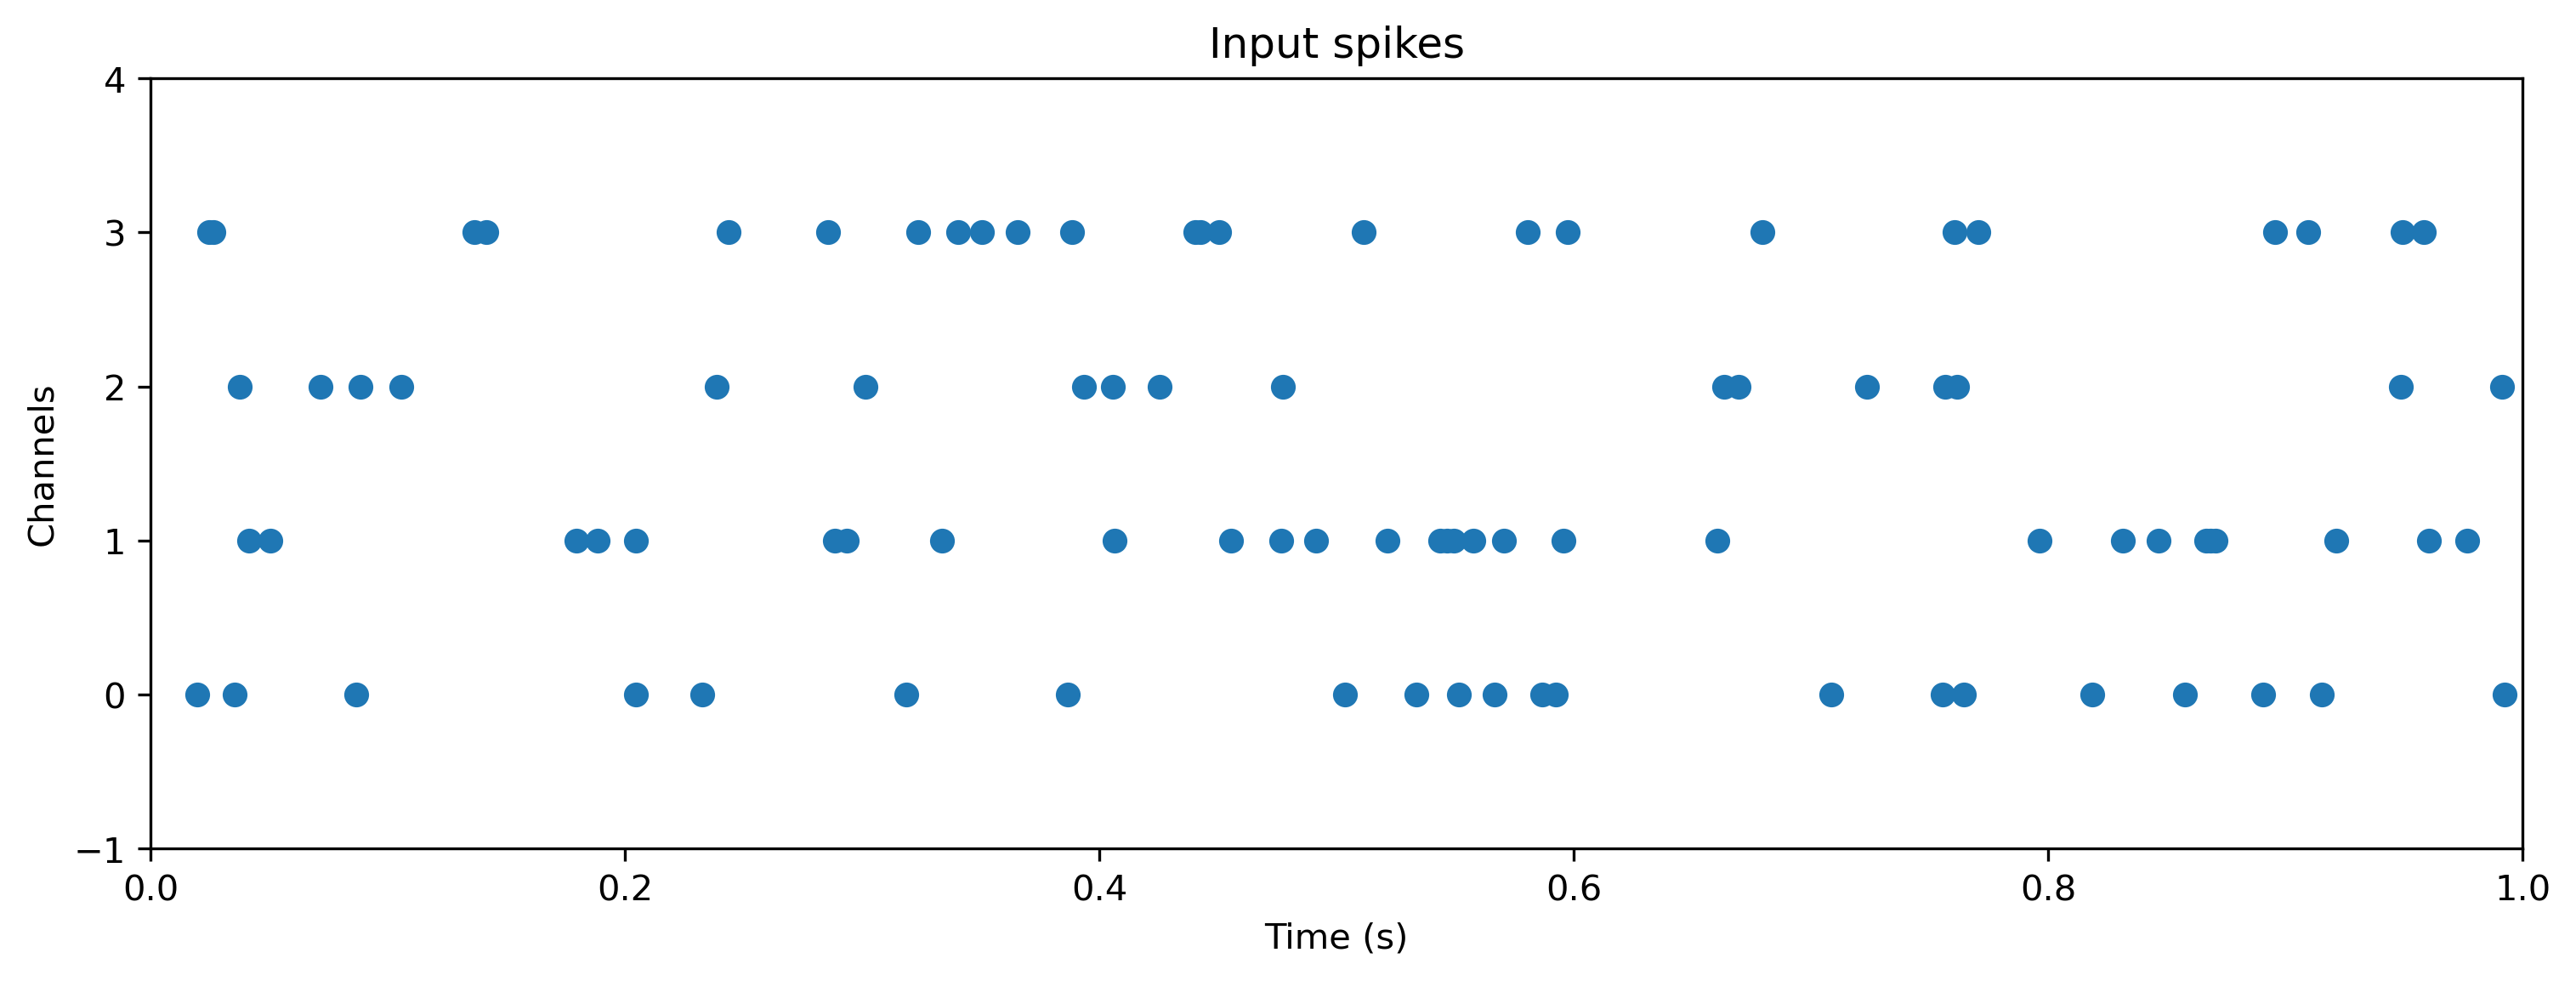

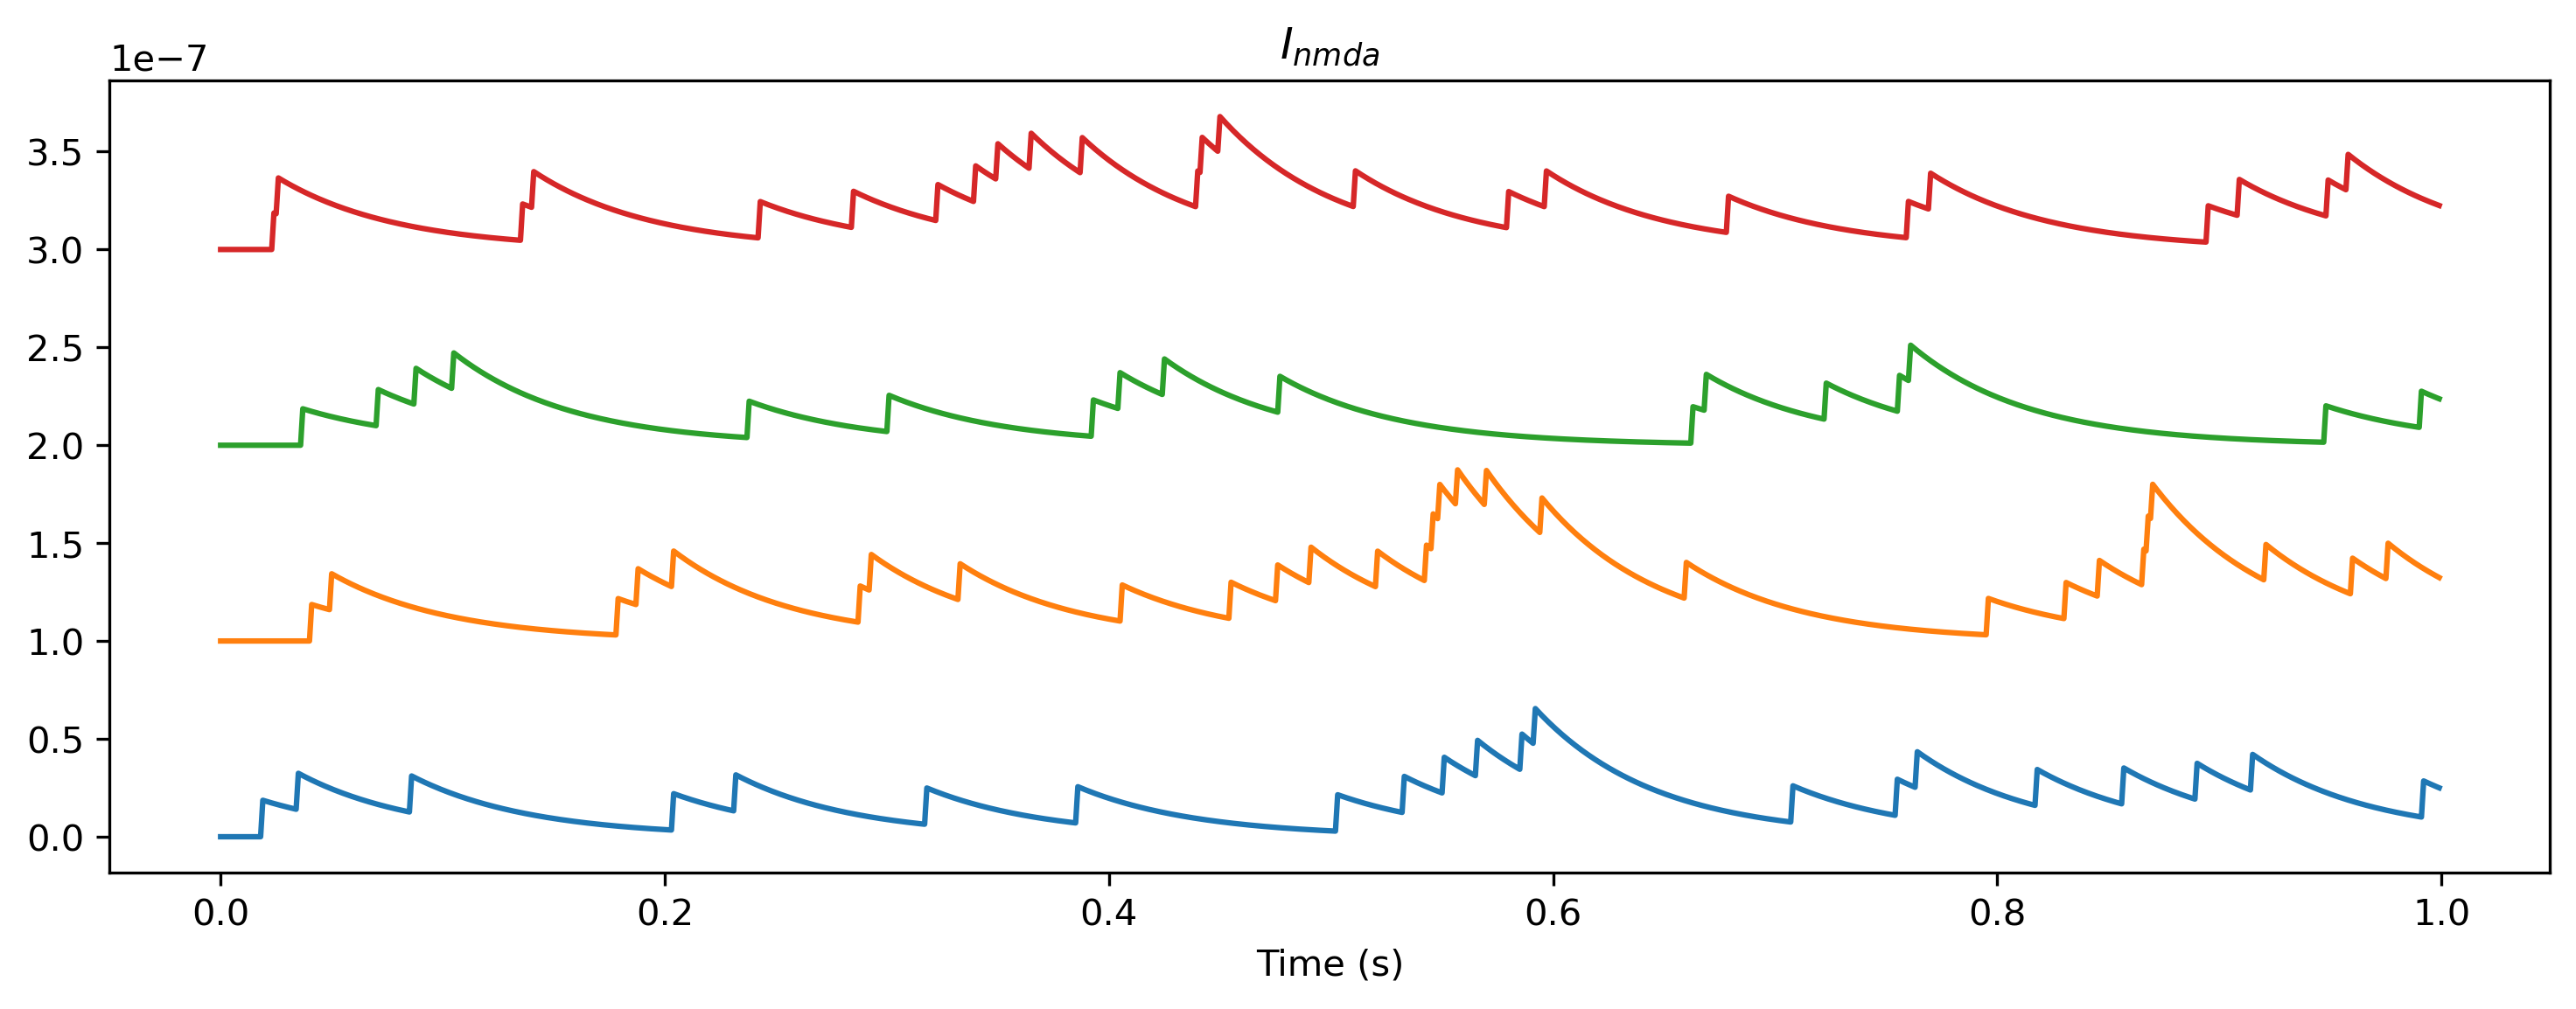

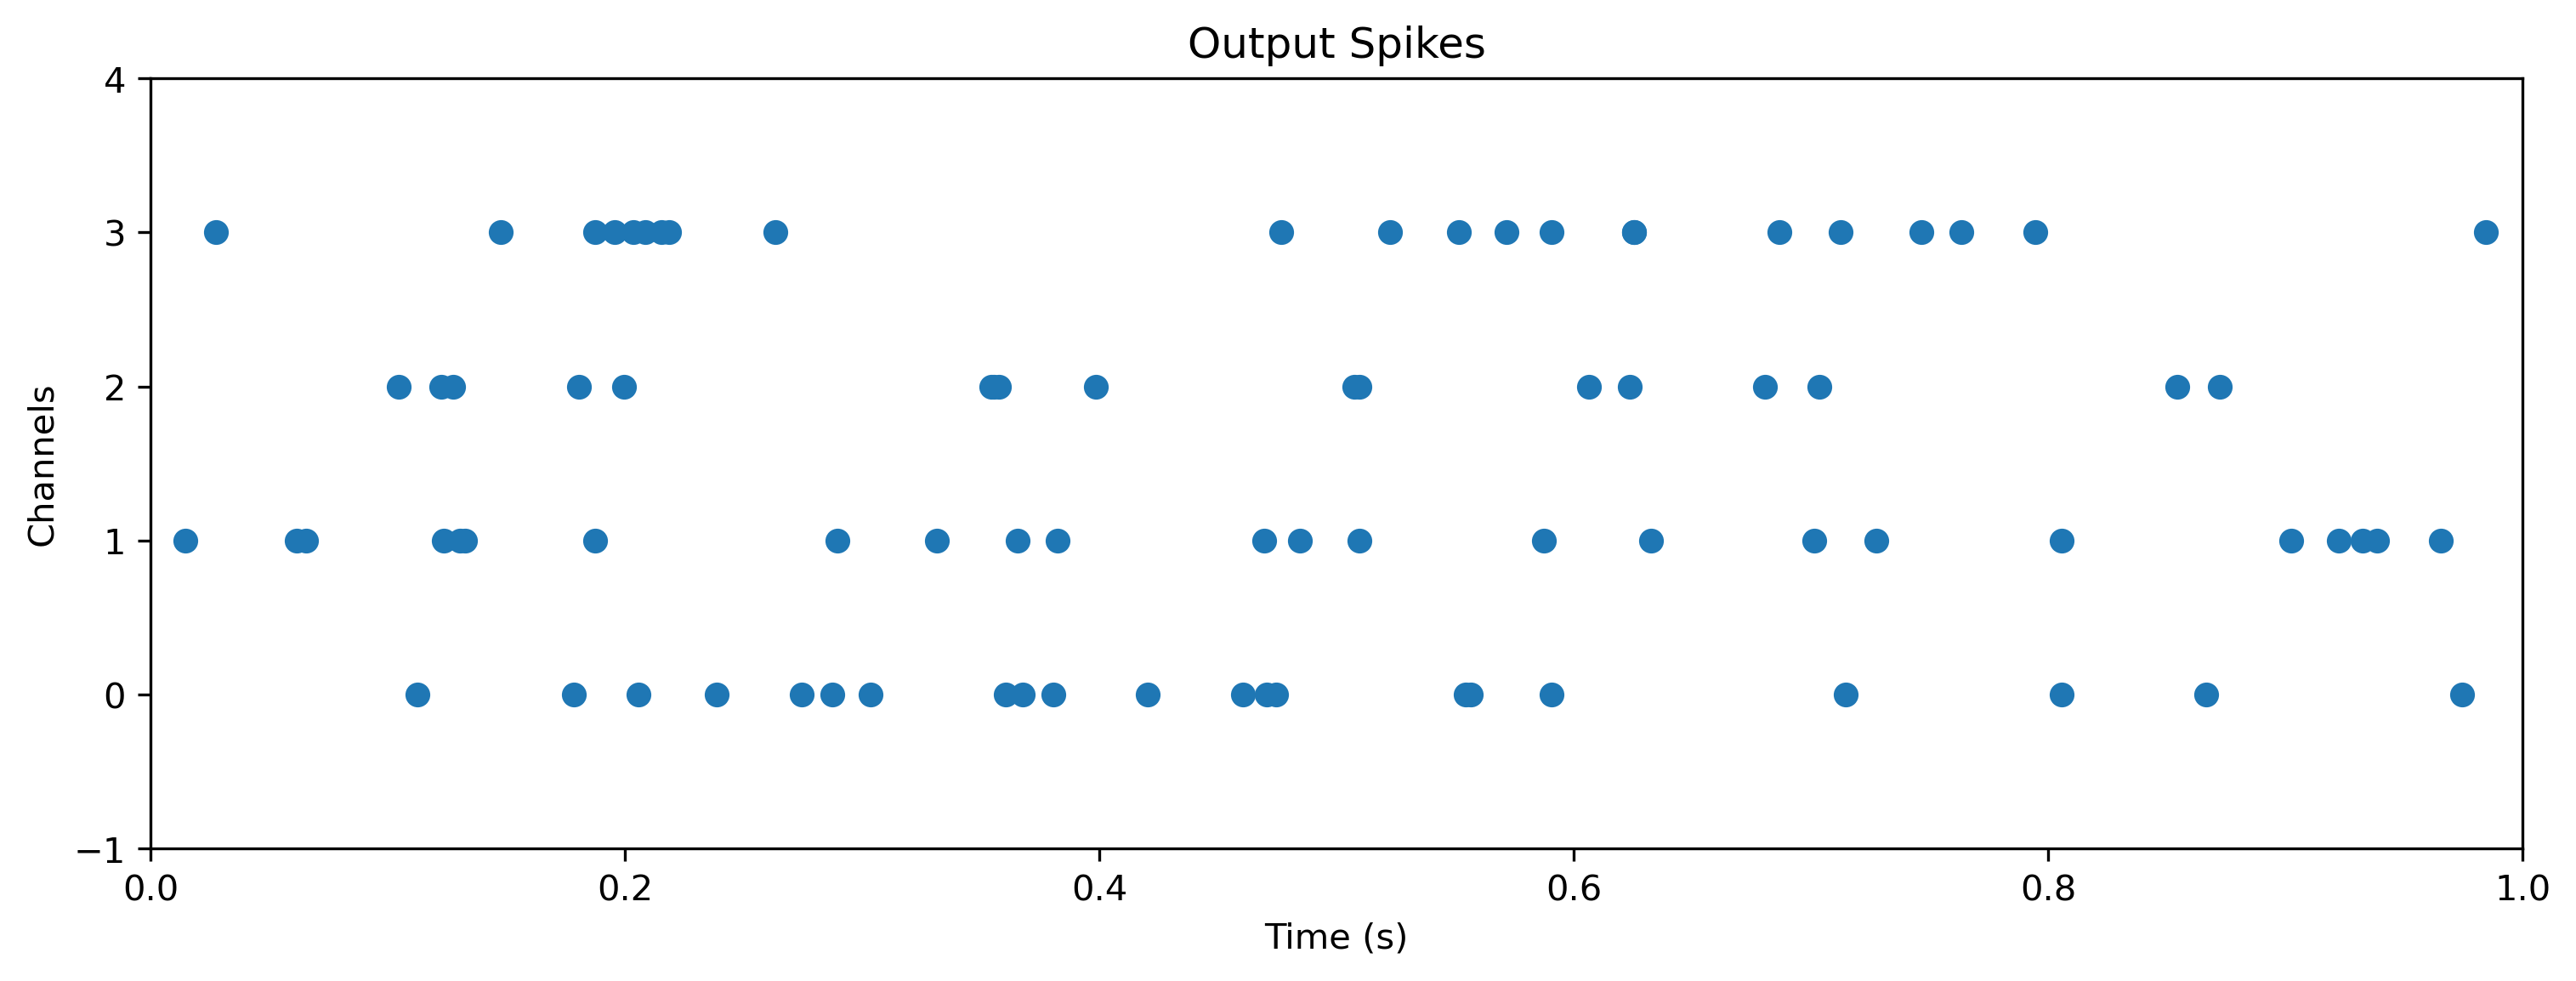

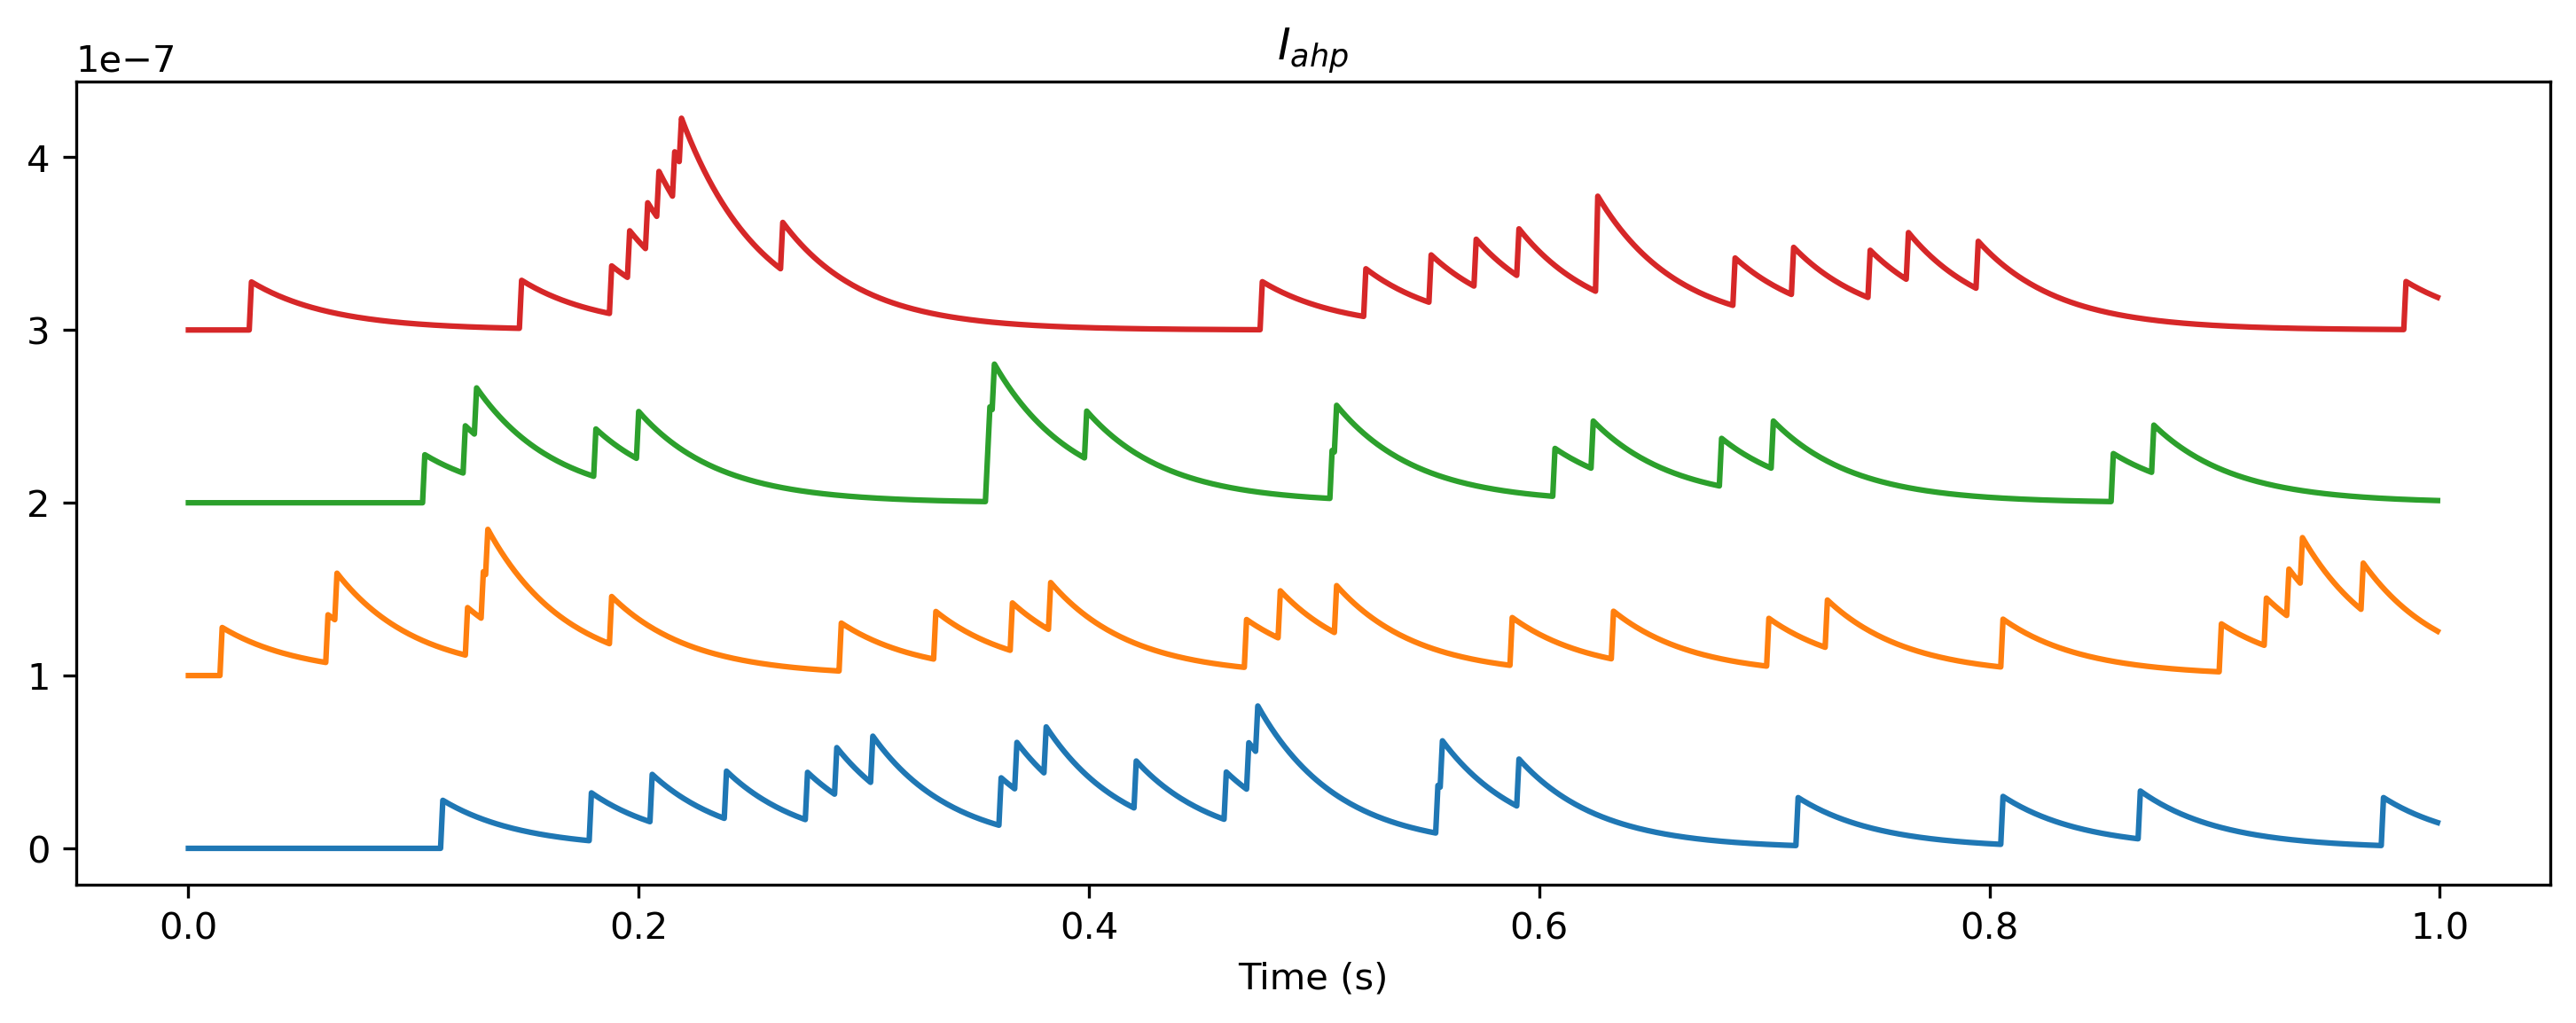

In [7]:
Iahp_ts, Inmda_ts, spikes_ts = plot_record_dict(record_dict)

In [8]:
# print(record_dict['Iahp'])
# print(se1._module.dt)
# print(se1._module.tau_ahp)
# print(se1._module.Ith_ahp)
# np.set_printoptions(threshold=sys.maxsize)

print(se1._module.Iw_ahp)

[1.e-06 1.e-06 1.e-06 1.e-06]
